# Aula 4 Imersão Dados Alura

# Importação Dos Pacotes

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importação Dos Dados

In [360]:
url_exp = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'
url_results = 'https://github.com/alura-cursos/imersao-dados-desafio-final/blob/main/Dados/dados_resultados.csv?raw=true'

dados_exp = pd.read_csv(url_exp, compression = 'zip')
dados_result = pd.read_csv(url_results)

# Análise e Limpeza Dos Dados

In [361]:
dados_exp.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [362]:
dados_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [363]:
dados_exp.columns = dados_exp.columns.str.replace('-', '')

In [364]:
dados_exp.rename(columns = {'droga':'composto'}, inplace=True)

In [365]:
dados_exp.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c90,c91,c92,c93,c94,c95,c96,c97,c98,c99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Desafio 01: Encontrar o top 10, das ações do MOA (inibidor, agonista...)

In [366]:
dados_moa = dados_result.drop('id', axis=1).sum().sort_values(ascending=False).reset_index()
dados_moa.columns = ['MOA', 'quantidade']
dados_moa

,MOA,quantidade
0,nfkb_inhibitor,832
1,proteasome_inhibitor,726
2,cyclooxygenase_inhibitor,435
3,dopamine_receptor_antagonist,424
4,serotonin_receptor_antagonist,404
...,...,...
201,protein_phosphatase_inhibitor,6
202,autotaxin_inhibitor,6
203,diuretic,6
204,erbb2_inhibitor,1


In [367]:
list_acao = []

moa_split = dados_moa['MOA'].str.split('_')
for row in moa_split:
    list_acao.append(row[-1])
list_acao[:5]

['inhibitor', 'inhibitor', 'inhibitor', 'antagonist', 'antagonist']

In [368]:
dados_moa['acao'] = list_acao
dados_moa.head()

,MOA,quantidade,acao
0,nfkb_inhibitor,832,inhibitor
1,proteasome_inhibitor,726,inhibitor
2,cyclooxygenase_inhibitor,435,inhibitor
3,dopamine_receptor_antagonist,424,antagonist
4,serotonin_receptor_antagonist,404,antagonist


In [524]:
top_10_acoes = dados_moa.groupby('acao').agg({'quantidade':'sum'}).sort_values('quantidade', ascending=False).head(10)
top_10_acoes = top_10_acoes.reset_index()
top_10_acoes

,acao,quantidade
0,inhibitor,9693
1,antagonist,3449
2,agonist,2330
3,blocker,323
4,agent,150
5,activator,115
6,local,80
7,antioxidant,73
8,anti-inflammatory,73
9,immunosuppressant,73


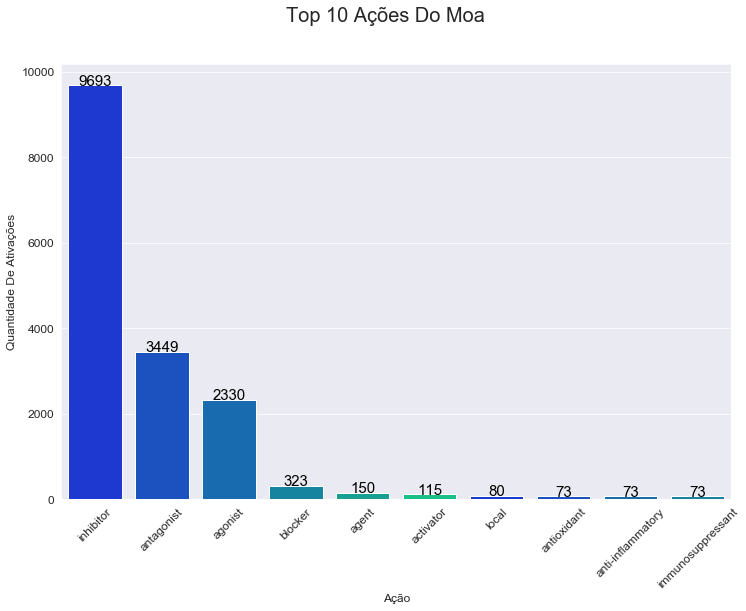

In [532]:
#Criando a figura
fig, ax = plt.subplots(figsize = (12,8))

#Setando a cor
sns.set_palette(sns.color_palette("winter"),10)

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.barplot(data=top_10_acoes, x='acao', y='quantidade', ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Top 10 Ações Do Moa', fontsize=20)
ax.set_xlabel('Ação', fontsize=12)
ax.set_ylabel('Quantidade De Ativações', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

#Adicionando os valores acima da barra
for index, row in top_10_acoes.iterrows():
    ax.text(index, row['quantidade'], row['quantidade'], color='black', ha="center", fontsize=15)
plt.xticks(rotation= 45)

#Mostrando o gráfico
plt.show()

# Desafio 02: Criar a coluna eh_controle para quando na linha tratamento == com_controle

In [370]:
mapa = {'com_controle':1, 'com_droga':0}
dados_exp['eh_controle'] = dados_exp['tratamento'].map(mapa)
dados_exp.tail(10)

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c91,c92,c93,c94,c95,c96,c97,c98,c99,eh_controle
23804,id_fff506720,com_droga,24,D1,74515bfd2,-1.0140,0.1709,-0.4291,1.8750,0.9859,...,0.3175,-1.5510,-1.2800,-0.7632,-0.6736,-0.4097,0.2282,-0.3213,-0.0836,0
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302,0
23806,id_fff790a17,com_droga,48,D2,47dd8f190,-0.1150,-0.8037,0.0988,-0.1301,0.2013,...,0.1086,-0.1686,-0.3482,0.4121,0.5728,1.2630,0.7823,-0.6947,0.7277,0
23807,id_fff7e6992,com_droga,48,D1,a28556d51,0.1420,-0.3696,-0.0093,-0.2495,-0.0175,...,0.5230,0.1589,0.7715,0.5497,0.6929,0.3738,0.8636,0.4494,0.1218,0
23808,id_fff8c2444,com_droga,72,D1,6c3a459be,0.1608,-1.0500,0.2551,-0.2239,-0.2431,...,0.3538,0.0558,0.3377,-0.4753,-0.2504,-0.7415,0.8413,-0.4259,0.2434,0
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680,0
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689,0
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808,1
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740,0
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520,0


# Desafio 03: Criar três colunas para indicar o tempo 24, 48, 72

In [371]:
mapa = {24:1, 48:0, 72:0}
dados_exp['24_h'] = dados_exp['tempo'].map(mapa)
dados_exp.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c92,c93,c94,c95,c96,c97,c98,c99,eh_controle,24_h
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0


In [372]:
mapa = {24:0, 48:1, 72:0}
dados_exp['48_h'] = dados_exp['tempo'].map(mapa)
dados_exp.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c93,c94,c95,c96,c97,c98,c99,eh_controle,24_h,48_h
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0


In [373]:
mapa = {24:0, 48:0, 72:1}
dados_exp['72_h'] = dados_exp['tempo'].map(mapa)
dados_exp.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c94,c95,c96,c97,c98,c99,eh_controle,24_h,48_h,72_h
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,0,1,0,0
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,0,0,1
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,0,0,0,1


# Criando colunas com o números de mecanismos ativados e se teve ou não algum ativado 

In [374]:
dados_result['n_moa'] = dados_result.drop('id', axis=1).sum(axis=1)
dados_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [375]:
dados_result['ativo_moa'] = dados_result['n_moa'] != 0
dados_result.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_moa,ativo_moa
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


# Desafio 04: Estudar sobre combinações de DF

Para fazer uma concatenação com um dataframe do pandas temos diversas opções, tanto horizontalmente e verticalmente, temos a função pandas.merge com diversos parâmetros para principalmente concatenação horizontal, ela também pode ser usada diretamente no dataframe sem criar um novo objeto(pandas.DataFrame.merge), para o mesmo fim temos a pd.DataFrame.join que apresenta menos flexibilidade.

Além disso pandas oferece o pd.concat, que serve tanto para horizaltal e vertical, e para uma concatenação rápida verticalmente oferece o pandas.DataFrame.append

In [376]:
dados_exp = dados_exp.merge(dados_result[['id', 'n_moa', 'ativo_moa']], on='id')

In [377]:
dados_exp.head()

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,eh_controle,24_h,48_h,72_h,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,0,1,0,0,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,0,0,1,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,0,0,0,1,1,True


# Desafio 05: Fazer análise mais detalhada considerando tempo e dose, para comparar as distribuições (Escolher uma droga e comparar com controle)

In [378]:
dados_exp.groupby(['dose', 'tempo']).agg({'n_moa':'sum', 'ativo_moa':'sum'})

n_moa  ativo_moa
dose tempo                  
D1   24      2754     2364.0
     48      3072     2632.0
     72      2775     2376.0
D2   24      2741     2354.0
     48      2757     2365.0
     72      2745     2356.0

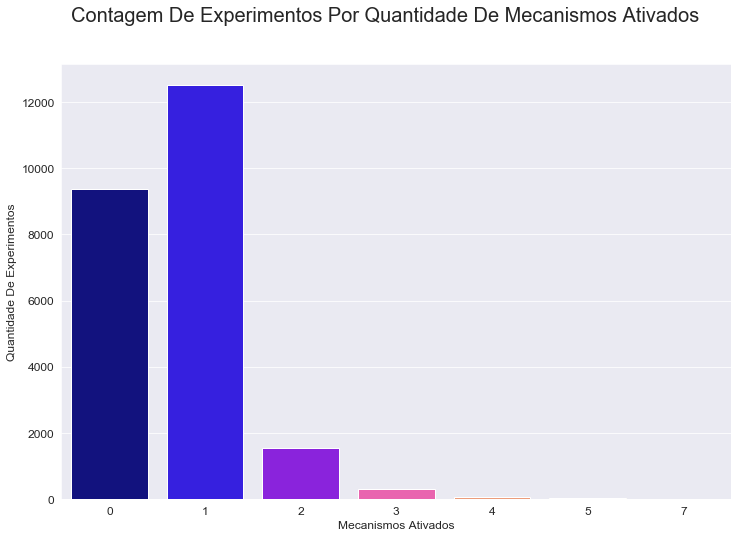

In [379]:
#Criando a figura
fig, ax = plt.subplots(figsize = (12,8))

#Setando a cor
sns.set_palette(sns.color_palette("gnuplot2"),7)

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.countplot(dados_exp['n_moa'], ax=ax)

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Contagem De Experimentos Por Quantidade De Mecanismos Ativados', fontsize=20)
ax.set_xlabel('Mecanismos Ativados', fontsize=12)
ax.set_ylabel('Quantidade De Experimentos', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


#Mostrando o gráfico
plt.show()

# Comparando os dados por composto

In [384]:
mais_moa = dados_exp[dados_exp['n_moa'] == 7]
mais_moa = mais_moa['composto'].values[0]

In [385]:
dados_instavelxcontrole = dados_exp[(dados_exp['composto'] == mais_moa) | (dados_exp['eh_controle'] == 1)]

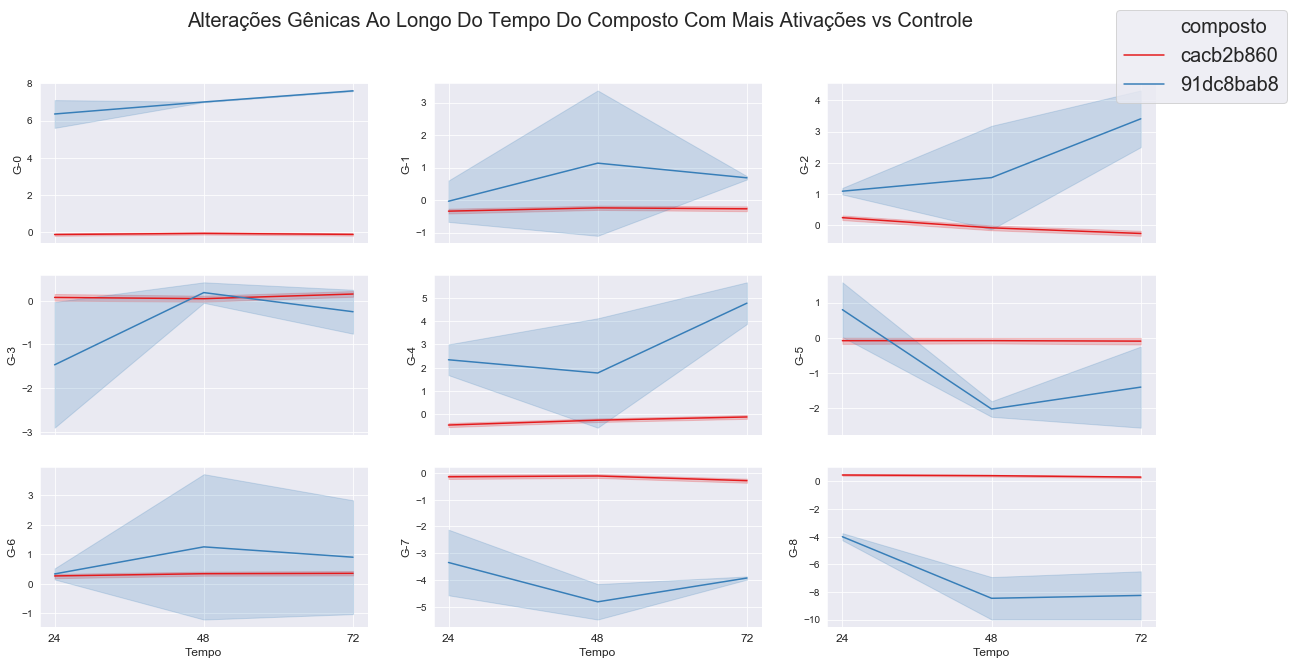

In [388]:
#Criando a figura
fig, ax = plt.subplots(3,3,figsize = (20,10), sharex=True)

#Setando a cor
sns.set_palette(sns.color_palette('Set1'),2)

#Mudando o estilo de fundo
sns.set_style('darkgrid')

#Criando o gráfico 
sns.lineplot(x='tempo', y='g0', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[0,0])
sns.lineplot(x='tempo', y='g1', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[0,1])
sns.lineplot(x='tempo', y='g2', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[0,2])
sns.lineplot(x='tempo', y='g3', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[1,0])
sns.lineplot(x='tempo', y='g4', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[1,1])
sns.lineplot(x='tempo', y='g5', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[1,2])
sns.lineplot(x='tempo', y='g6', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[2,0])
sns.lineplot(x='tempo', y='g7', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[2,1])
sns.lineplot(x='tempo', y='g8', data=dados_instavelxcontrole.loc[:, 'tempo':], hue='composto', ax=ax[2,2])

#Plotando as legendas e mudando o tamanho das fontes
fig.suptitle('Alterações Gênicas Ao Longo Do Tempo Do Composto Com Mais Ativações vs Controle', fontsize=20)

ax[0,0].set_ylabel('G-0', fontsize=12)
ax[0,1].set_ylabel('G-1', fontsize=12)
ax[0,2].set_ylabel('G-2', fontsize=12)
ax[1,0].set_ylabel('G-3', fontsize=12)
ax[1,1].set_ylabel('G-4', fontsize=12)
ax[1,2].set_ylabel('G-5', fontsize=12)
ax[2,0].set_ylabel('G-6', fontsize=12)
ax[2,1].set_ylabel('G-7', fontsize=12)
ax[2,2].set_ylabel('G-8', fontsize=12)


ax[2,0].set_xlabel('Tempo', fontsize=12)
ax[2,1].set_xlabel('Tempo', fontsize=12)
ax[2,2].set_xlabel('Tempo', fontsize=12)

ax[2,0].set_xticks([24,48,72])
ax[2,1].set_xticks([24,48,72])
ax[2,2].set_xticks([24,48,72])

ax[2,0].set_xticklabels([24,48,72], fontsize=12)
ax[2,1].set_xticklabels([24,48,72], fontsize=12)
ax[2,2].set_xticklabels([24,48,72], fontsize=12)

handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=20)

for i in range(3):
    for j in range(3):
        ax[i,j] = ax[i,j].get_legend().remove()

#Mostrando o gráfico
plt.show()

# Desafio 06: Descobrir se tem algum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

In [503]:
compostos_drop = dados_exp['composto'].value_counts() == 1
compostos_drop = compostos_drop.reset_index()
compostos_drop

,index,composto
0,cacb2b860,False
1,87d714366,False
2,9f80f3f77,False
3,8b87a7a83,False
4,5628cb3ee,False
...,...,...
3284,a1a9a44dd,True
3285,06787fefe,True
3286,d532d49de,True
3287,122c63321,True


In [504]:
compostos_drop = compostos_drop.loc[compostos_drop['composto'] == True,'index']
compostos_drop = compostos_drop.to_list()

In [505]:
dados_filtrados = dados_exp.drop(index=dados_exp[dados_exp['composto'].isin(compostos_drop)].index)
dados_filtrados

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,eh_controle,24_h,48_h,72_h,n_moa,ativo_moa
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,-0.3981,0.2139,0.3801,0.4176,0,1,0,0,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.1522,0.1241,0.6077,0.7371,0,0,0,1,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.6417,-0.2187,-1.4080,0.6931,0,0,1,0,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-1.6210,-0.8784,-0.3876,-0.8154,0,0,1,0,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.1094,0.2885,-0.3786,0.7125,0,0,0,1,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.0631,0.9171,0.5258,0.4680,0,1,0,0,1,True
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,-0.2084,-0.1224,-0.2715,0.3689,0,1,0,0,1,True
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.2256,0.7592,0.6656,0.3808,1,0,1,0,0,False
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,0.1732,0.7015,-0.6290,0.0740,0,1,0,0,1,True


In [518]:
dados_filtrados.drop_duplicates(['composto', 'ativo_moa'], keep=False)

,id,tratamento,tempo,dose,composto,g0,g1,g2,g3,g4,...,c96,c97,c98,c99,eh_controle,24_h,48_h,72_h,n_moa,ativo_moa


### Observamos que eliminando primeiramente todas as drogas que participaram de apenas um experimento e após isso todos os experimentos que tiveram o mesmo composto e que a ativação desse composto não mudou percebemos que não achamos nenhum composto que dependendo da configuração do experimento, ativa ou não ativa algum MOA

# Desafio 7 : Descobrir se tem algum composto que dependendo da configuração do experimento, ativa MOAs diferentes

In [519]:
data = pd.merge(dados_result, dados_filtrados[['id', 'composto']], on= 'id')
data.drop(columns='n_moa', inplace=True)
data

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,ativo_moa,composto
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,b68db1d53
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,df89a8e5a
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,18bb41b2c
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,8c7f86626
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,7cbed3131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23680,id_fffb1ceed,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,df1d0a5a1
23681,id_fffb70c0c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,ecf3b6b74
23682,id_fffc1c3f4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,False,cacb2b860
23683,id_fffcb9e7c,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,True,8b87a7a83


In [499]:
data = data.drop_duplicates(data.columns[1:], keep=False)
data

In [501]:
data.sort_values('composto')

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,ativo_moa,composto


In [502]:
data['composto'].unique()

array([], dtype=object)

### Eliminando os compostos que só foram utilizadas em um experimento e depois eliminando os experimento que tinham todas as colunas(mesmos composto e mesmos MOAs ativados) não foi achado nenhum composto que dependendo da configuração do experimento, ativa MOAs diferentes

# Resumo

Nessa aula vimos a importância de concatenar dados de dois arquivos diferentes e como isso pode ser poderoso e ajudar a retirar informações concretas dos dados, vimos a real ação dos compostos a partir dos dados do resultado e que a maioria dos compostos possui uma ação inibidora

Vimos como criar novas colunas e como isso pode ser útil na hora de filtrar as informações

Aprendemos a função de um experimento controle, que não pode ativar nenhum mecanismo para ser possível comparar com os demais experimentos